In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [28]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

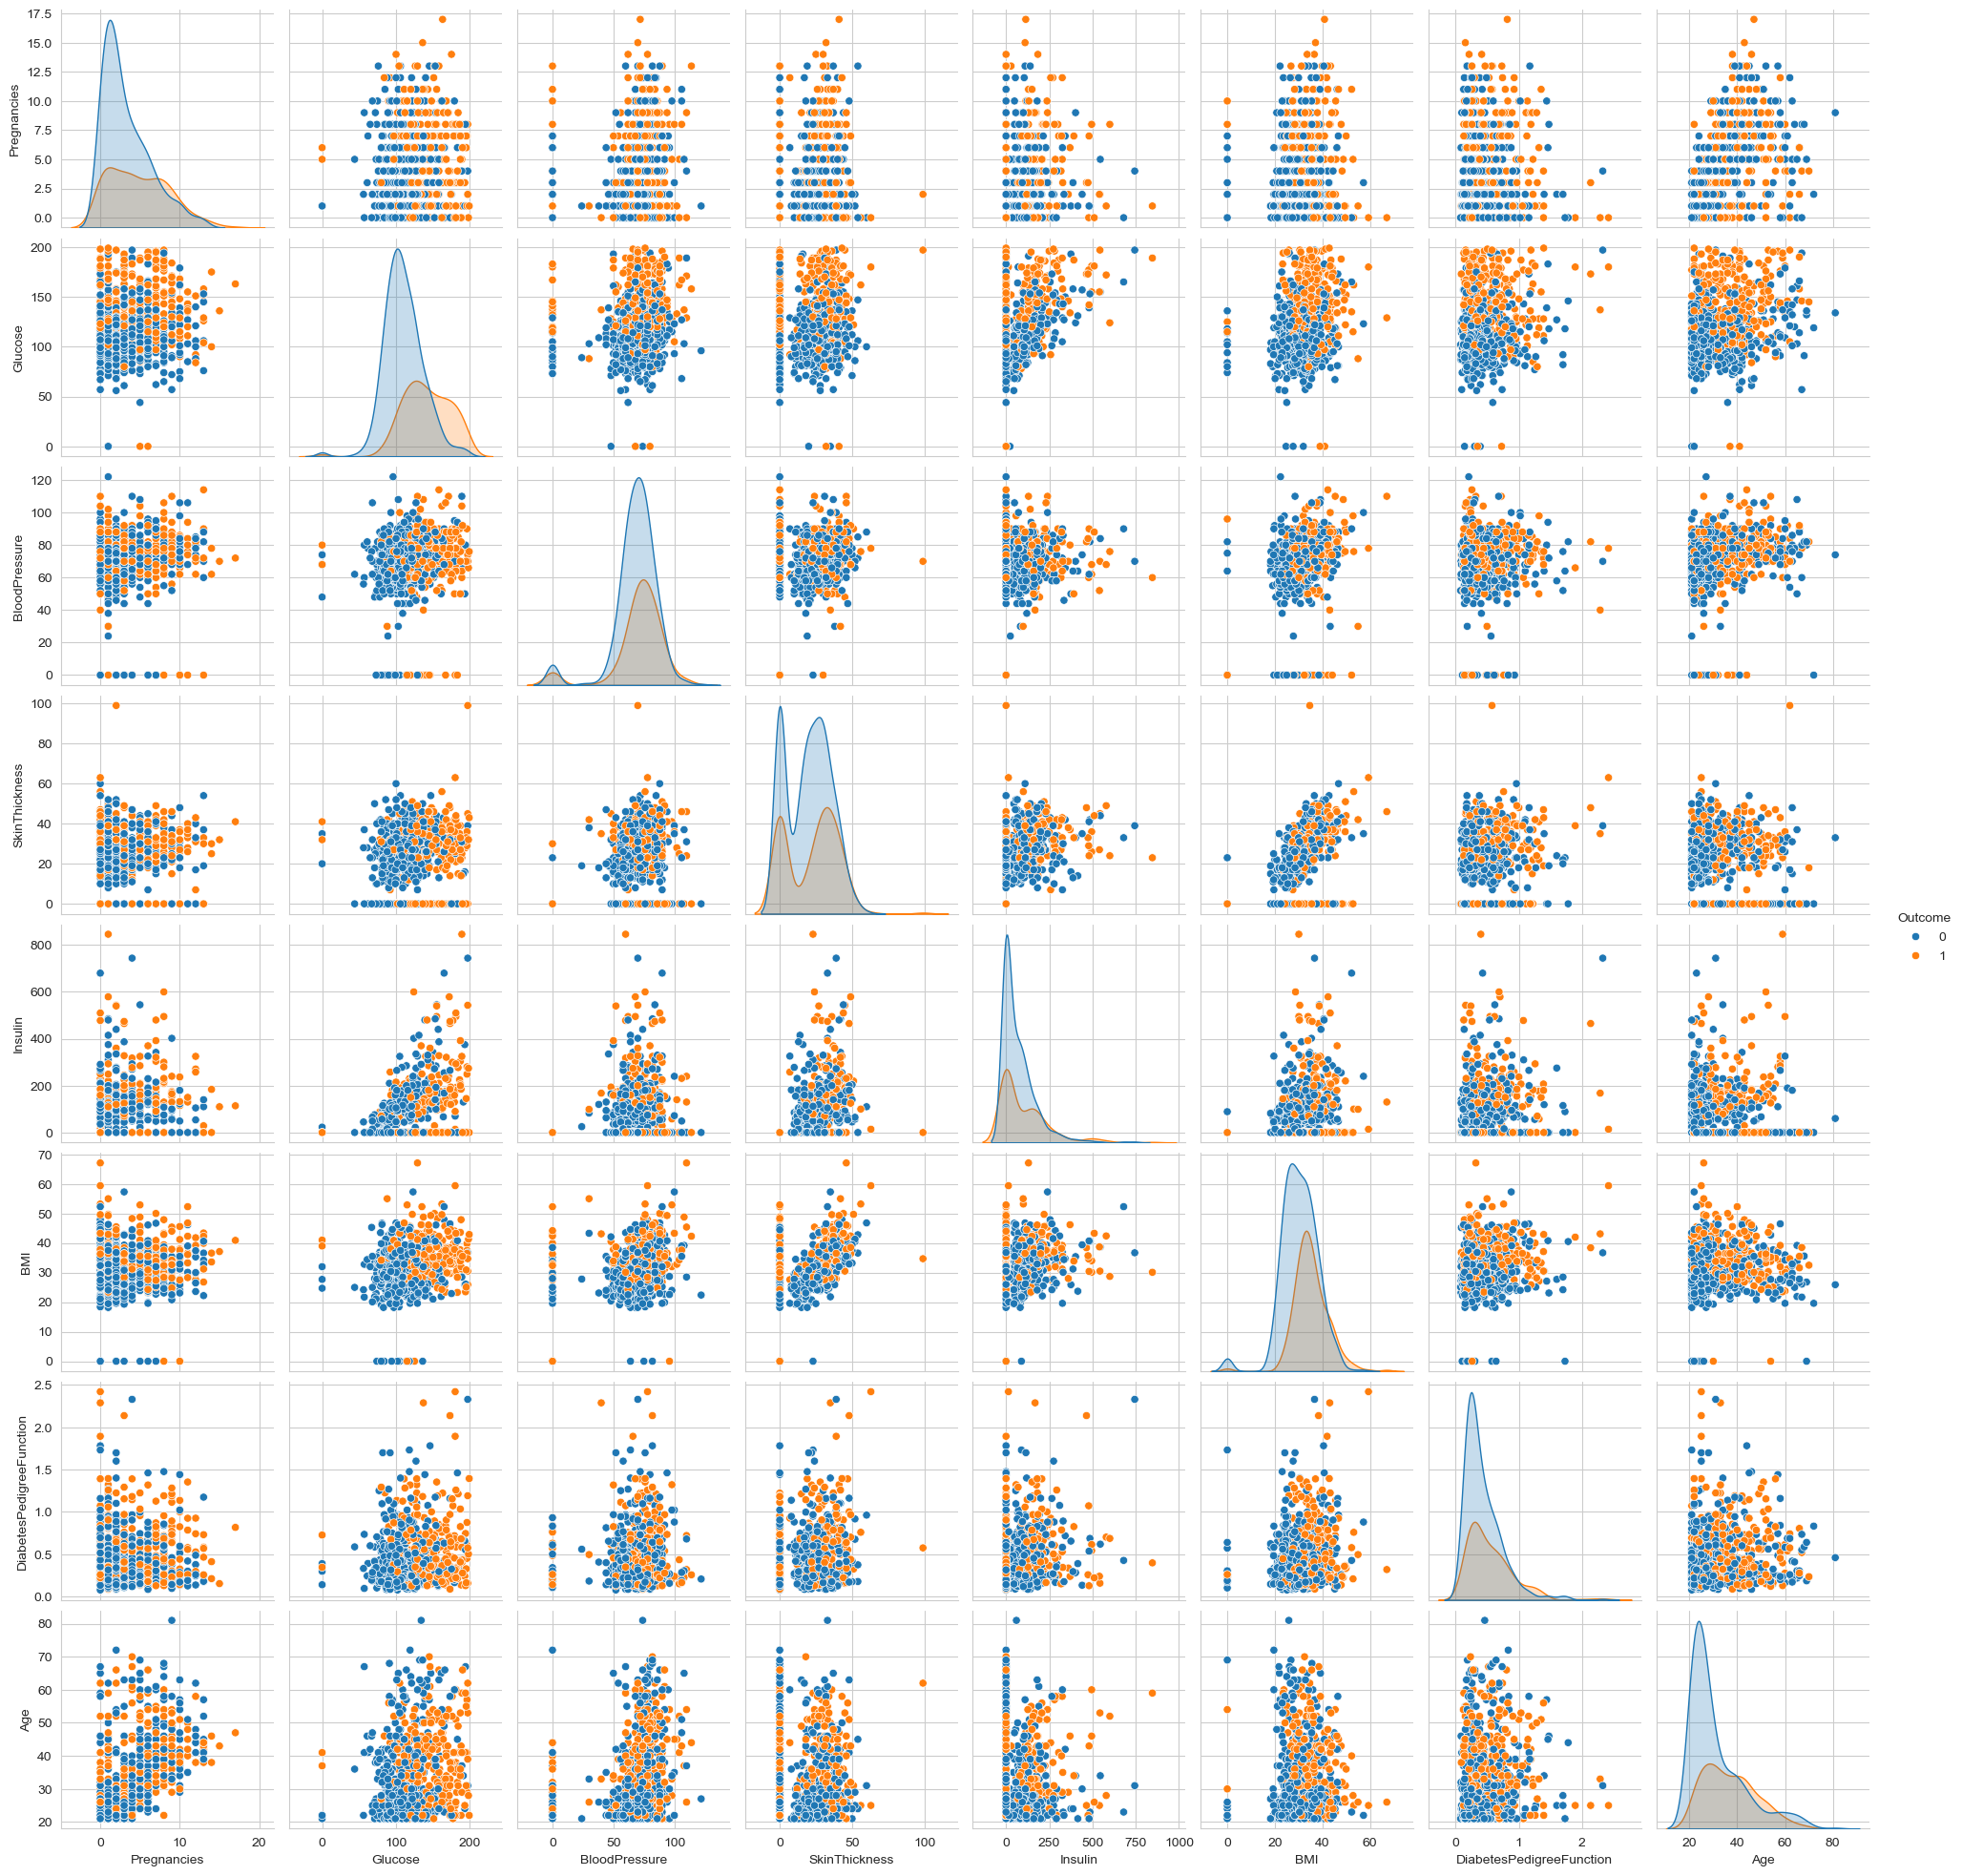

In [29]:
#plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Outcome')
sns.set_style('whitegrid')
plt.show()

In [32]:
#correlation - to identify least important features related to target variable
df_corr = df.corr()
target_corr = df_corr['Outcome'].sort_values()
target_corr

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [34]:
df.drop(columns = ['BloodPressure', 'SkinThickness', 'Insulin'], inplace = True)

In [37]:
df.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

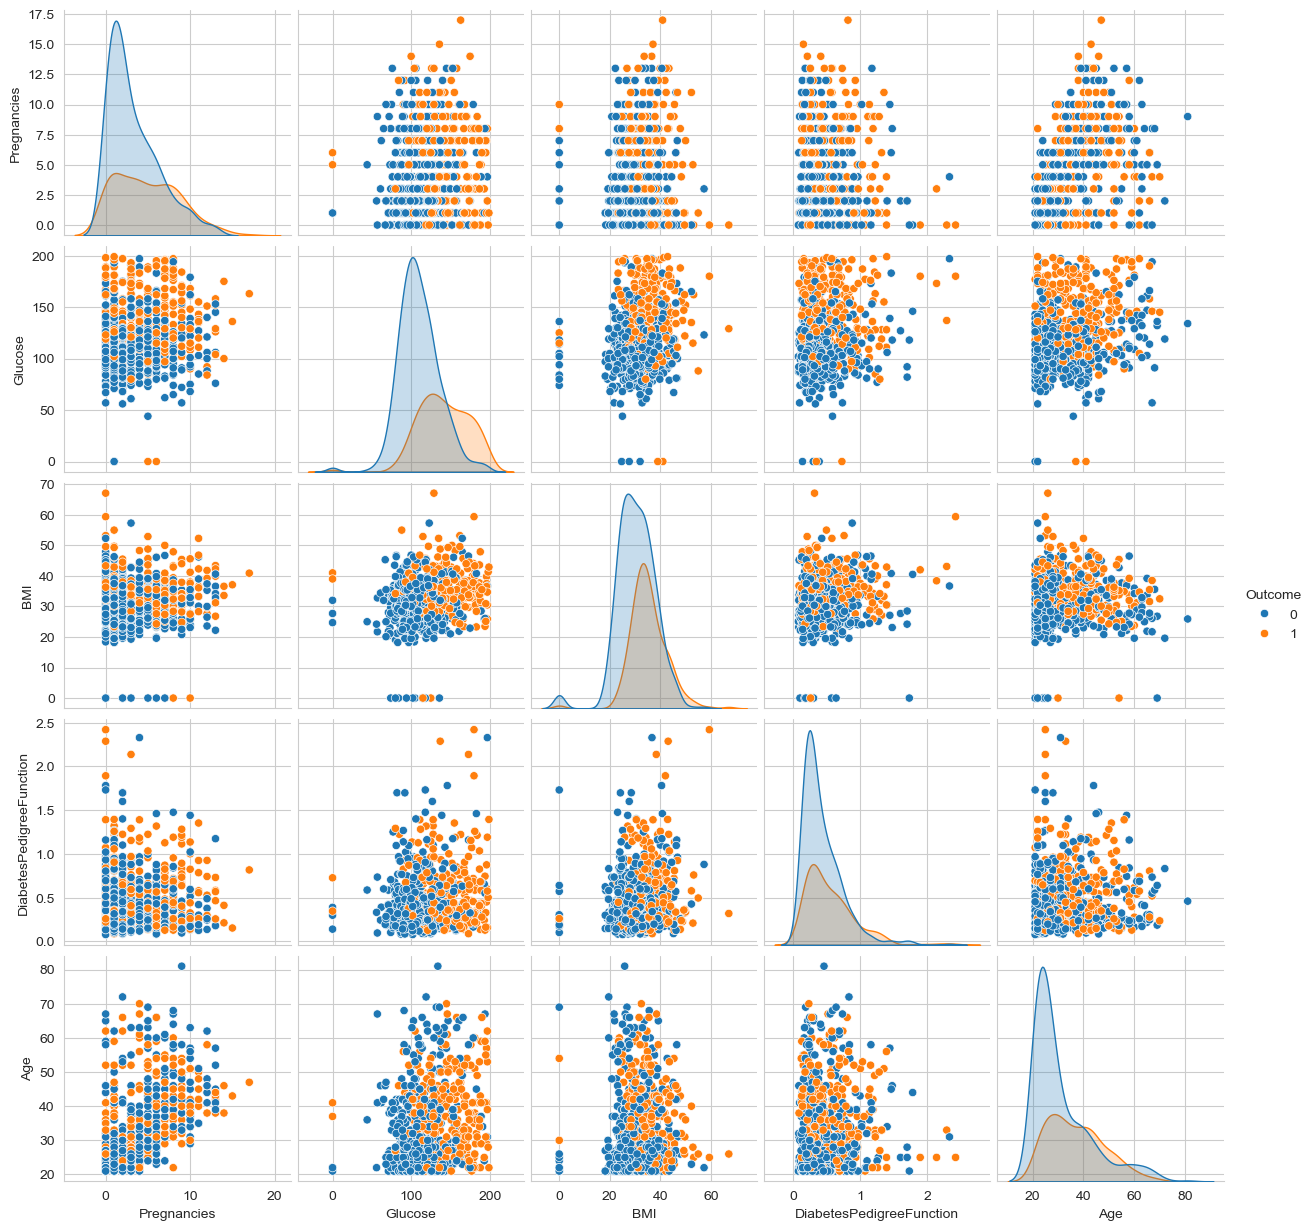

In [38]:
#plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Outcome')
sns.set_style('whitegrid')
plt.show()

In [39]:
X = df.drop(columns = 'Outcome')
Y = df['Outcome']

In [40]:
X.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
4,0,137,43.1,2.288,33


In [41]:
Y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [43]:
X_train.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,31.983388,0.469168,32.907166
std,3.313264,32.035057,7.740625,0.336847,11.503437
min,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,27.100000,0.241500,24.000000
50%,3.000000,117.000000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,36.375000,0.613750,40.000000
max,17.000000,199.000000,67.100000,2.420000,81.000000


In [45]:
X_train.min()

Pregnancies                  0.000
Glucose                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64

In [46]:
X_train.max()

Pregnancies                  17.00
Glucose                     199.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
dtype: float64

## Load the model

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [54]:
pred = model.predict(X_test)

## Evaluate the model

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

accuracy = accuracy_score(Y_test, pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(Y_test, pred)
print(f'Confusion Matrix:\n{cm}')

f1 = f1_score(Y_test, pred)
print(f'F1-Score: {f1}')

Accuracy: 0.7662337662337663
Confusion Matrix:
[[81 18]
 [18 37]]
F1-Score: 0.6727272727272727


## Checking with different values of k

In [63]:
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)  
    pred = knn.predict(X_test)  # Predictions for the current k value
    accuracy = accuracy_score(Y_test, pred)  # Use pred for the current k value
    accuracies.append(accuracy)  # Append accuracy for each k



In [64]:
accuracies

[0.7012987012987013,
 0.7207792207792207,
 0.7402597402597403,
 0.7532467532467533,
 0.7662337662337663,
 0.7402597402597403,
 0.7402597402597403,
 0.7597402597402597,
 0.7272727272727273,
 0.7402597402597403,
 0.7402597402597403,
 0.7337662337662337,
 0.7467532467532467,
 0.7597402597402597,
 0.7467532467532467,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7532467532467533]

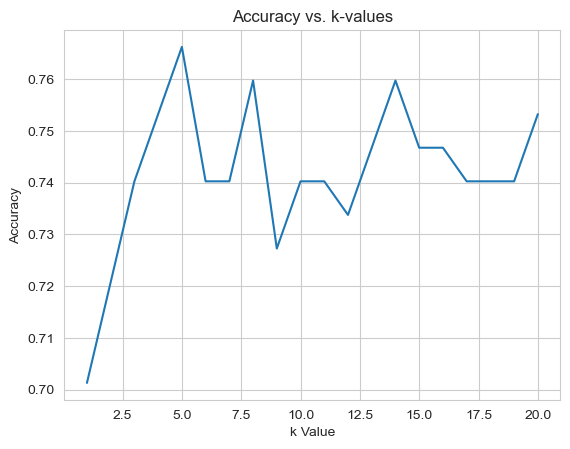

In [65]:
# Plot accuracy as a function of k
plt.plot(k_values, accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k-values')
plt.show()